### Implementation details

For solving this environment we have used the Deep Deterministic Policy Gradient Algorithm (DDPG).
DDPG is similar to Deep Q Network (DQN), however it can be used to work in continuous action spaces. As our environment had actions each in range of -1 to +1, DDPG proved to be useful here. 

DDPG uses an Actor-Critic model architecture, where the Actor is basically our Policy-based model, and the Critic is 
a Value-based model. The Actor does the predictions for the optimal actions, given the input state, while the Critic, as the name suggests, provides a feedback or an evaluation of those actions selected by the Actor and thus helps in improving the Actor's performance. 

The Critic evaluates the Actor's output action [continuous action] using a Q-value. So it takes as input the (state, action) pair and returns the Q-value estimate. The loss function for the Critic is similar to DQN's loss function for the Q-function. 
$$ L_i(\theta_i) = \mathbb{E}_{(s,a,r,s^{'}) \sim U(D)} \big{[} \big{(} r + \gamma Q(s^{'}, \mu(s^{'} ; \phi^{-}) ; \theta^{-}) - Q(s, a ; \theta_i) \big{)}^{2} \big{]}$$

Here, $\phi^{-}$ and $\theta^{-}$ denote the parameters of target networks for Actor and Critic respectively. 
$(s,a,r,s^{'}) \sim U(D)$ denote the sampled experiences from a replay buffer. Similar to DQN, even in DDPG we store our experiences in a replay buffer. We sample some mini batches from it and use those to make our models (both Actor and Critic) learn. 
As shown above, the Critic tries to reduce the expected Q-value of the current state, as set by the Target network $(\theta^{-})$, compared to what the local network $(\theta_i)$ is computing for that (state, action) pair. Also note that here, instead of using an argmax like in DQN, DDPG uses a target deterministic policy function $\mu(s^{'} ; \phi^{-})$ that is trained to approximate that greedy action. 

Similar to the Critic, the objective of the Actor is to maximise the expected Q-value using the policy network $(\mu(s ; \phi))$. That is, the agent tries to find the action that maximizes this value. In practice, we use minimization techniques, and therefore minimize the negative of this objective. $$J_i(\phi_i) = \mathbb{E}_{s \sim U(D)} \big{[} Q(s, \mu(s ; \phi) ; \theta) \big{]} $$

Here, $\phi$ and $\theta$ denote the parameters of the local Actor and Critic networks respectively. 

During training, the states are passed to the agent in agent.act() function. 
This function just passes the state through our Actor network to get the estimated best actions for that state. 
To add a factor of exploration to the Actor network, we add an off-policy Ornstein-Uhlenbeck noise to the estimated actions. 
**NOTE: we use an epsilon-greedy factor while adding this noise to our estimates, which we get by multiplying an epsilon factor to the noise, where the epsilon keeps decaying as the episodes keep increasing. This keeps exploration at peak towards the start and slowly as the episodes are high, we start exploiting our learnings.**

In each episode of training, the agent is passed the state of the environment, then it acts on it and decides an 
action, and then we get a Reward and new state. This tuple of (current_state, action, reward, next_state) is passed to 
the agent in agent.step() function. 

In agent.step() the agent stores each of these experience tuples in a Replay buffer. After every 20 such steps, if the Replay buffer size is more than the batch size (256), then we randomly sample the experience tuples and use it to train our Actor and Critic networks for 10 times each, using the objective functions mentioned above. 

The DDPG, similar to DQN, uses another concept called 'Fixed Target', for which it creates the target labels using another set of networks with a fixed set of weights. These labels will be used to calculate the loss and do back-propagation. 
The Target weights are then updated to the local weights using soft-update.

We repeat the process for 500 episodes, and in each episode we run for 1000 iterations.This helps the agent learn the environment and achieve a good score. 

### Learning Algorithm

We have used Deep Deterministic Policy Gradient Algorithm for training the agent. 
Within DDPG, we have used concepts like Replay buffer, Fixed Targets, off-policy exploration using Ornstein-Uhlenbeck noise, using epsilon-decay for exploration-exploitation, soft-updates of targets, etc. for improving the algorithm. 

The most important improvement is we used shared experiences from multiple agents (20) to expedite and stabilise our learning. 
**NOTE: We trained the models on the 20 agent environment. The learned checkpoints can be used on both 20 agent and single agent environments, and both perform exceptionally well. Each score above 35 points in test.** 

The training algorithm uses several hyperparameters, like epsilon start value, epsilon decay, minimum value of epsilon,
learning rate, discount factor. Even the Replay buffer size, number of steps to update the local weights form hyperparameters. While copying the Local weights to the Target weights, we use a soft update parameter called TAU. This is also a hyperparameter.
The most important hyperparameters which actually impacted greatly in training were the number of times we updated the weights of the networks in each step and the weight decay. 

The model architecture for both Actor and Critic are very simple. The Actor consists of 3 Fully connected layers. All the Fully connected layers have ReLU activations except for the last one. The output uses tanh activation to keep the action range in -1 to +1. 

Similarly, the Critic consists of 4 Fully connected layers. The output layer returns a single value, which is the estimated Q-value for the input (state, action) pair. All the Fully connected layers have ReLU activations except for the last one.
The number of neurons in each layer of the networks is also a hyperparameter.

### Plot of rewards

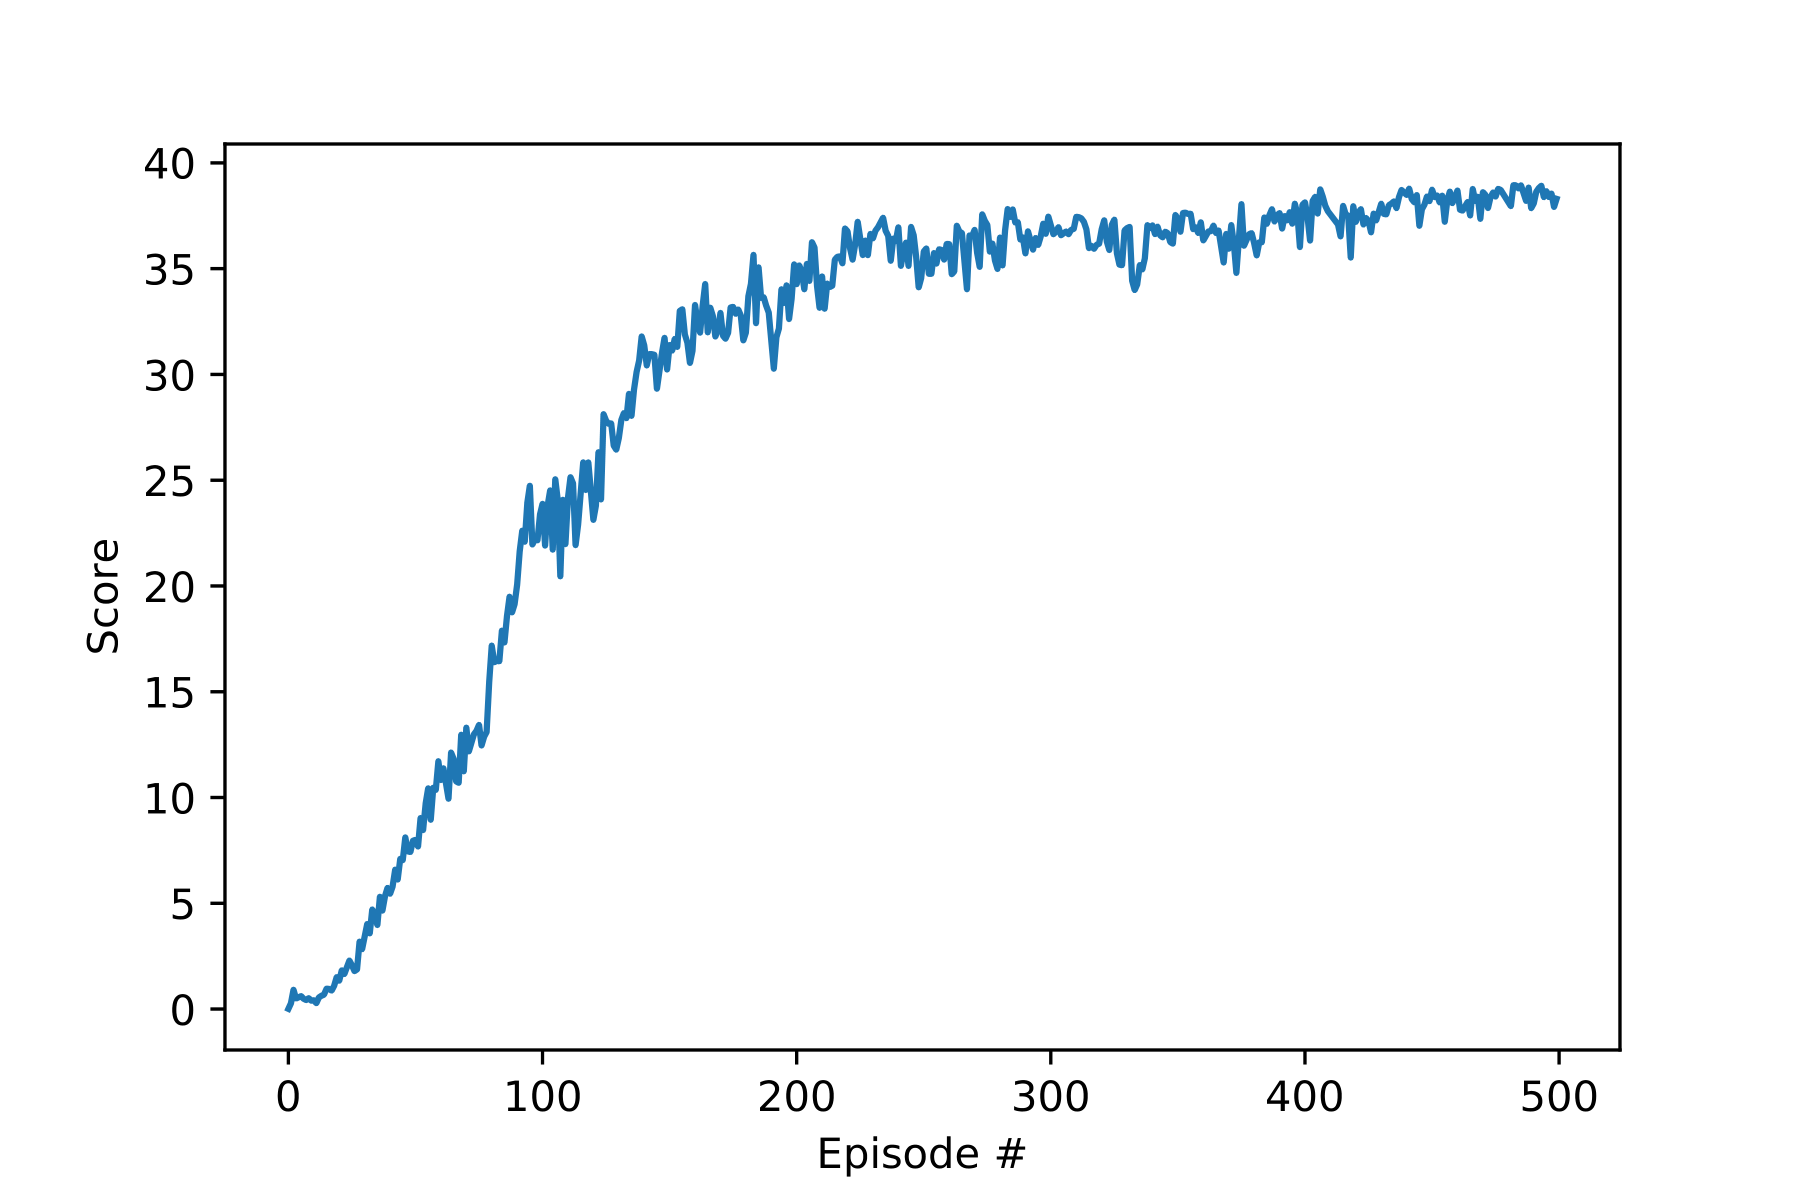

The environment was solved in 400 episodes with an Average Score (over all 20 agents) of 38.06 over 100 consecutive episodes. 
We were able to get an average score of 30 in below 300 episodes. 

**NOTE: We can use the same network for training a single agent environment also. However the agent takes much longer to train.
Due to limitation of time and resources we have not trained on the single agent environment.**

### Ideas for Future work

The model's performance can be improved if we use a deeper Neural network with more layers. Apart from this, the DDPG algorithm itself can be improved even more using techniques involving double learning like twin-delayed DDPG (TD3). 
We can also try to explore the performance of algorithms like PPO, A3C and A2C on this continuous action space setup. 